## Problem Statement-

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor

import scipy.stats as stats

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv("test.csv")

In [4]:
combined=pd.concat([train,test],ignore_index=False)

In [5]:
train.shape,test.shape,combined.shape

((550068, 12), (233599, 11), (783667, 12))

In [6]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
# Stay in Current City Years

In [9]:
combined.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [10]:
combined["Stay_In_Current_City_Years"]=np.where(combined["Stay_In_Current_City_Years"]=="4+",4,\
                                                combined["Stay_In_Current_City_Years"])

In [11]:
combined.Stay_In_Current_City_Years.unique()

array(['2', 4, '3', '1', '0'], dtype=object)

In [12]:
# Convert the stay in current city in numeric-

In [13]:
combined["Stay_In_Current_City_Years"]=combined["Stay_In_Current_City_Years"].astype("int")

<Axes: >

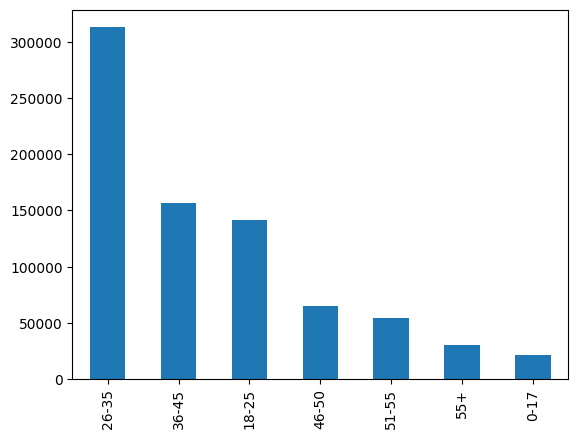

In [14]:
#Age
combined.Age.value_counts().plot(kind="bar")

In [15]:
combined.groupby("Age")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


<Axes: xlabel='Age', ylabel='Purchase'>

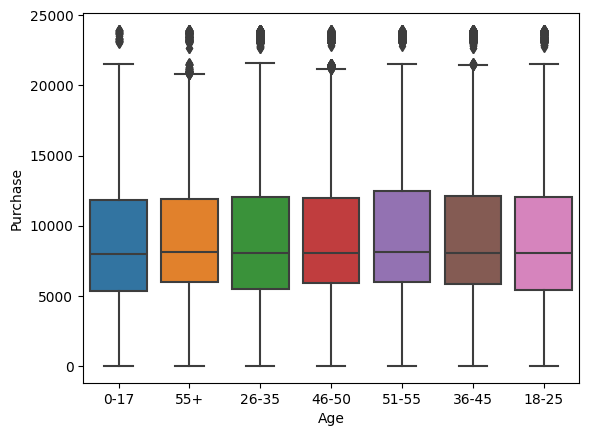

In [16]:
sns.boxplot(x="Age",y="Purchase",data=combined)

In [17]:
# By looking at the plots we can conclude that there is no relation of the age and traget.
# We will have to deploy anova to find if this is true

# Ho: Age and purchase are not related/Independent.
# Ha: Age and purchase are related

In [18]:
import statsmodels.formula.api as sfa
from statsmodels.stats.anova import anova_lm

In [19]:
model=sfa.ols("Purchase~Age",data=train).fit()
print(anova_lm(model))

                df        sum_sq       mean_sq          F        PR(>F)
Age            6.0  6.140003e+09  1.023334e+09  40.575799  1.053564e-49
Residual  550061.0  1.387270e+13  2.522030e+07        NaN           NaN


In [20]:
# Conclude: Since the PValue is less than 0.05, We reject the Ho:
# It means age variable has a relation with the target

In [21]:
# Age into numbers
combined.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [22]:
combined["Age"]=np.where(combined["Age"]=="55+","56",combined["Age"])

In [23]:
combined.Age.unique()

array(['0-17', '56', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [24]:
#combined.Age[0].str.split("-",expand=True)

In [25]:
#Splitted the age into two columns
combined[["Zero","One"]]=combined.Age.str.split("-",expand=True)

In [26]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Zero,One
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,0,17
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,17
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,0,17
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,0,17
4,1000002,P00285442,M,56,16,C,4,0,8,NaN,NaN,7969.0,56,None


In [27]:
# Replace none with 56
combined.One.replace(to_replace=np.NaN,value=56,inplace=True)

In [28]:
combined["Age_Numeric"]=(pd.to_numeric(combined["Zero"])+pd.to_numeric(combined["One"]))/2

In [29]:
#Lets apply statistical test to verify if there is any relation between age and purchase
# Ho: Age and purchase are independent
# Ha: Age and purchase are dependent
import scipy.stats as stats
# Two sample Independent T test
stats.ttest_ind(combined.Age_Numeric,combined.Purchase)

Ttest_indResult(statistic=nan, pvalue=nan)

In [30]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Zero,One,Age_Numeric
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,0,17,8.5
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,17,8.5
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,0,17,8.5
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,0,17,8.5
4,1000002,P00285442,M,56,16,C,4,0,8,NaN,NaN,7969.0,56,56,56.0


### Analyzing Numerical Data

<Figure size 1000x1000 with 0 Axes>

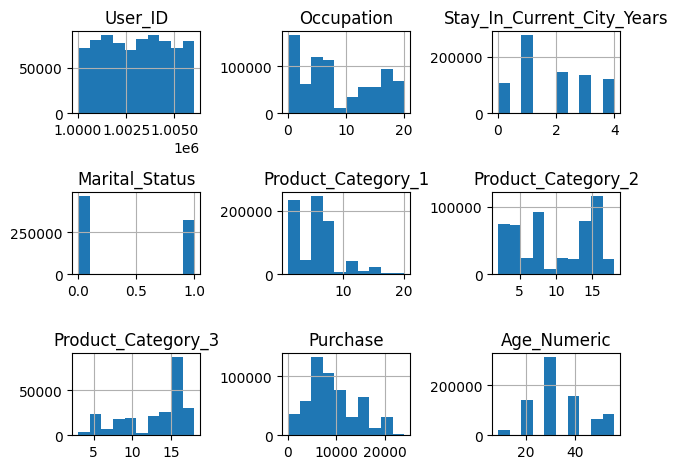

In [31]:
plt.figure(figsize=(10,10))

combined.hist()
plt.tight_layout()
plt.show()

In [32]:
combined['User_ID'].value_counts()

1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1000341      13
1003275      13
1002037      13
1004991      13
1006034      13
Name: User_ID, Length: 5891, dtype: int64

In [33]:
# Checking the Products for userid 1001680
combined[combined['User_ID'] == 1001680]['Product_ID']

11055     P00036742
11056     P00130642
11057     P00105442
11058     P00245642
11059     P00123342
            ...    
230813    P00278142
230814    P00290042
230815    P00257542
230816    P00258242
230817    P00187942
Name: Product_ID, Length: 1468, dtype: object

In [34]:
combined['Product_ID'].value_counts()

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64

In [35]:
combined['Product_cat'] = combined['Product_ID'].apply(lambda x: x[:5])
combined['Product_cat'].unique()

array(['P0006', 'P0024', 'P0008', 'P0028', 'P0019', 'P0018', 'P0034',
       'P0097', 'P0027', 'P0025', 'P0001', 'P0003', 'P0014', 'P0023',
       'P0096', 'P0005', 'P0022', 'P0015', 'P0021', 'P0030', 'P0013',
       'P0016', 'P0007', 'P0011', 'P0029', 'P0026', 'P0010', 'P0094',
       'P0031', 'P0036', 'P0012', 'P0033', 'P0004', 'P0032', 'P0035',
       'P0098', 'P0002', 'P0000', 'P0017', 'P0020', 'P0099', 'P0009',
       'P0037', 'P0095', 'P0093'], dtype=object)

In [36]:
combined.groupby(by='Product_cat')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_cat,,,,,,,,
P0000,17542.0,9423.513453,4871.239416,685.0,5943.25,8093.0,12116.00,21533.0
P0001,12390.0,9718.467716,4874.988427,1474.0,6020.25,8105.5,12419.75,21565.0
P0002,14364.0,9982.273531,5493.383018,195.0,5949.75,8028.0,15330.00,21077.0
P0003,16833.0,8934.747223,4542.108192,186.0,5444.00,8019.0,11713.00,23302.0
P0004,14014.0,9506.121521,4896.270199,185.0,5469.00,8049.0,12373.50,20971.0
P0005,20253.0,10196.986669,5468.172264,684.0,6060.00,9702.0,13659.00,23961.0
P0006,6240.0,8708.035417,4154.205551,187.0,5825.00,8014.5,11557.00,21474.0
P0007,10468.0,9631.469813,5201.039458,684.0,5460.00,8096.0,13213.25,23933.0
P0008,17538.0,9137.949481,5800.265562,187.0,5832.25,8254.5,11332.00,23959.0


### Feature Engineering

In [37]:
newtrain = combined.iloc[0:train.shape[0]-1, ]
newtest = combined.iloc[train.shape[0]:, ]

In [38]:
# Product Id and Purchase

newtrain['magic1'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('count')
newtrain['magic2'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('min')
newtrain['magic3'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('median')
newtrain['magic4'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('std')
newtrain['magic5'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('max')

In [39]:
newtrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Purchase,Zero,One,Age_Numeric,Product_cat,magic1,magic2,magic3,magic4,magic5
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,8370.0,0,17,8.5,P0006,6240,187.0,8014.5,4154.205551,21474.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,15200.0,0,17,8.5,P0024,16155,1476.0,8064.0,4677.566930,21516.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,1422.0,0,17,8.5,P0008,17538,187.0,8254.5,5800.265562,23959.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,1057.0,0,17,8.5,P0008,17538,187.0,8254.5,5800.265562,23959.0
4,1000002,P00285442,M,56,16,C,4,0,8,NaN,...,7969.0,56,56,56.0,P0028,15354,188.0,7860.0,4292.880133,21522.0


In [40]:
newtrain.groupby(by='Product_ID')['Purchase'].transform(lambda x: x.quantile([0.25, 0.50, 0.75]))

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
550062   NaN
550063   NaN
550064   NaN
550065   NaN
550066   NaN
Name: Purchase, Length: 550067, dtype: float64

In [41]:
newtest['magic1'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('count')
newtest['magic2'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('min')
newtest['magic3'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('median')
newtest['magic4'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('std')
newtest['magic5'] = newtrain.groupby(by='Product_cat')['Purchase'].transform('max')

In [42]:
newtest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,Purchase,Zero,One,Age_Numeric,Product_cat,magic1,magic2,magic3,magic4,magic5
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,...,NaN,46,50,48.0,P0012,6240,187.0,8014.5,4154.205551,21474.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,...,NaN,26,35,30.5,P0011,16155,1476.0,8064.0,4677.566930,21516.0
2,1000010,P00288442,F,36-45,1,B,4,1,5,14.0,...,NaN,36,45,40.5,P0028,17538,187.0,8254.5,5800.265562,23959.0
3,1000010,P00145342,F,36-45,1,B,4,1,4,9.0,...,NaN,36,45,40.5,P0014,17538,187.0,8254.5,5800.265562,23959.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,...,NaN,26,35,30.5,P0005,15354,188.0,7860.0,4292.880133,21522.0


In [43]:
newtrain['user_count'] = newtrain.groupby(by='User_ID')['Purchase'].transform('count')
newtrain['user_min'] = newtrain.groupby(by='User_ID')['Purchase'].transform('min')
newtrain['user_median'] = newtrain.groupby(by='User_ID')['Purchase'].transform('median')
newtrain['user_std'] = newtrain.groupby(by='User_ID')['Purchase'].transform('std')
newtrain['user_max'] = newtrain.groupby(by='User_ID')['Purchase'].transform('max')

In [44]:
newtest['user_count'] = newtrain.groupby(by='User_ID')['Purchase'].transform('count')
newtest['user_min'] = newtrain.groupby(by='User_ID')['Purchase'].transform('min')
newtest['user_median'] = newtrain.groupby(by='User_ID')['Purchase'].transform('median')
newtest['user_std'] = newtrain.groupby(by='User_ID')['Purchase'].transform('std')
newtest['user_max'] = newtrain.groupby(by='User_ID')['Purchase'].transform('max')

In [45]:
newtrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,...,magic1,magic2,magic3,magic4,magic5,user_count,user_min,user_median,user_std,user_max
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,...,6240,187.0,8014.5,4154.205551,21474.0,35,612.0,9946.0,4639.871552,19219.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,...,16155,1476.0,8064.0,4677.566930,21516.0,35,612.0,9946.0,4639.871552,19219.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,...,17538,187.0,8254.5,5800.265562,23959.0,35,612.0,9946.0,4639.871552,19219.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,...,17538,187.0,8254.5,5800.265562,23959.0,35,612.0,9946.0,4639.871552,19219.0
4,1000002,P00285442,M,56,16,C,4,0,8,NaN,...,15354,188.0,7860.0,4292.880133,21522.0,77,119.0,9899.0,4301.736734,20657.0


In [46]:
newtrain.isnull().sum()[newtrain.isnull().sum() != 0]

Product_Category_2    173637
Product_Category_3    383246
dtype: int64

In [47]:
copy = newtrain.dropna()

In [48]:
newtrain.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Zero', 'One',
       'Age_Numeric', 'Product_cat', 'magic1', 'magic2', 'magic3', 'magic4',
       'magic5', 'user_count', 'user_min', 'user_median', 'user_std',
       'user_max'],
      dtype='object')

In [49]:
cols = ['Age_Numeric', 'magic1', 'magic2', 'magic3', 'magic4',
       'magic5', 'user_count', 'user_min', 'user_median', 'user_std',
       'user_max']

list_cols = []

for i in cols:
    teststatistic, pvalue = stats.ttest_ind(copy.loc[:, i], copy['Purchase'])

    if pvalue < 0.05:
        print(i)
        list_cols.append(i)
    else:
        pass

Age_Numeric
magic1
magic2
magic3
magic4
magic5
user_count
user_min
user_median
user_std
user_max


In [50]:
my_cols = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Product_cat']

final_train = newtrain.loc[:, my_cols+list_cols]
final_test = newtest.loc[:, my_cols+list_cols]

In [51]:
final_train.shape, final_test.shape

((550067, 24), (233599, 24))

### Treating Missing Values

In [52]:
final_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173637
Product_Category_3            383246
Purchase                           0
Product_cat                        0
Age_Numeric                        0
magic1                             0
magic2                             0
magic3                             0
magic4                             0
magic5                             0
user_count                         0
user_min                           0
user_median                        0
user_std                           0
user_max                           0
dtype: int64

In [53]:
final_train.groupby(by='Product_cat')['Product_Category_2'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_cat,,,,,,,,
P0000,14440.0,10.097022,5.103168,2.0,5.0,12.0,15.0,17.0
P0001,7970.0,9.988206,5.421416,2.0,6.0,10.0,16.0,17.0
P0002,10071.0,9.017675,4.745550,2.0,8.0,8.0,14.0,16.0
P0003,11739.0,8.853139,5.183174,2.0,4.0,8.0,14.0,17.0
P0004,10645.0,11.005918,5.632042,2.0,5.0,14.0,16.0,18.0
P0005,16719.0,9.995753,5.227168,2.0,5.0,8.0,15.0,17.0
P0006,4577.0,8.774962,6.112226,2.0,2.0,10.0,15.0,17.0
P0007,7953.0,9.792657,5.741224,2.0,4.0,11.0,15.0,17.0
P0008,13445.0,11.773299,4.123458,2.0,8.0,14.0,14.0,17.0


In [54]:
final_train.groupby(by='Product_cat')['Product_Category_3'].describe()

,count,mean,std,min,25%,50%,75%,max
Product_cat,,,,,,,,
P0000,6186.0,9.789363,4.033059,5.0,6.0,8.0,14.0,16.0
P0001,5248.0,13.743521,4.301988,5.0,13.0,16.0,17.0,17.0
P0002,3808.0,12.266019,3.663173,5.0,9.0,14.0,16.0,18.0
P0003,7810.0,13.654802,3.869284,5.0,12.0,15.0,16.0,18.0
P0004,2965.0,13.048904,3.962370,6.0,8.0,15.0,15.0,17.0
P0005,9838.0,12.514942,4.761030,3.0,11.0,15.0,16.0,18.0
P0006,2130.0,10.773239,3.715421,4.0,9.0,12.0,13.0,16.0
P0007,4474.0,15.236477,1.556148,9.0,14.0,16.0,16.0,17.0
P0008,6321.0,13.000949,3.777850,8.0,8.0,14.0,17.0,17.0


In [55]:
final_train.groupby(by=['City_Category', 'Gender'])['Product_Category_2'].describe()

count       mean       std  min  25%   50%   75%  \
City_Category Gender                                                        
A             F        23488.0  10.129385  4.800494  2.0  6.0  11.0  14.0   
              M        74873.0   9.884324  5.087711  2.0  5.0   9.0  15.0   
B             F        38700.0   9.995633  4.852719  2.0  5.0  10.0  14.0   
              M       118983.0   9.770875  5.146326  2.0  5.0   9.0  15.0   
C             F        29342.0   9.930782  4.951379  2.0  5.0  10.0  14.0   
              M        91044.0   9.733448  5.212294  2.0  5.0   8.0  15.0   

                       max  
City_Category Gender        
A             F       18.0  
              M       18.0  
B             F       18.0  
              M       18.0  
C             F       18.0  
              M       18.0

In [56]:
# For train set
final_train['Product_Category_2'] = final_train.groupby(by=['City_Category', 'Gender'])['Product_Category_2'].apply(lambda x: x.fillna(x.median()))
final_train['Product_Category_3'] = final_train.groupby(by=['City_Category', 'Gender'])['Product_Category_3'].apply(lambda x: x.fillna(x.median()))

In [57]:
# For test set
final_test['Product_Category_2'] = final_test.groupby(by=['City_Category', 'Gender'])['Product_Category_2'].apply(lambda x: x.fillna(x.median()))
final_test['Product_Category_3'] = final_test.groupby(by=['City_Category', 'Gender'])['Product_Category_3'].apply(lambda x: x.fillna(x.median()))

In [58]:
final_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Product_cat                   0
Age_Numeric                   0
magic1                        0
magic2                        0
magic3                        0
magic4                        0
magic5                        0
user_count                    0
user_min                      0
user_median                   0
user_std                      0
user_max                      0
dtype: int64

In [59]:
final_train.drop(['User_ID', 'Product_ID', 'Product_cat'], axis=1, inplace=True)
final_test.drop(['User_ID', 'Product_ID', 'Product_cat', 'Purchase'], axis=1, inplace = True)

### Encoding

In [60]:
final_train['Age'].unique()

array(['0-17', '56', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [61]:
mapped = {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6, '56':7 }

In [62]:
final_train['Age'] = final_train['Age'].map(mapped)
final_test['Age'] = final_test['Age'].map(mapped)

In [63]:
encoded_train = pd.get_dummies(final_train, drop_first=True)
encoded_test = pd.get_dummies(final_test, drop_first=True)

### Modelling

In [66]:
X = encoded_train.drop('Purchase', axis=1)
y = encoded_train['Purchase']

In [67]:
def base_models():
    models = dict()
    models["LR"] = LinearRegression()
    models["DTree"] = DecisionTreeRegressor()
    models["RF"] = RandomForestRegressor()
    models["GBM"] = GradientBoostingRegressor()
    models["XGB"] = XGBRegressor()
    
    return models

In [71]:
def eval_models(model):
    cv = KFold(n_splits=3, shuffle = True, random_state = 42)
    scores = -cross_val_score(estimator = model, X = X, 
                             y = y, cv = cv,
                            scoring="neg_mean_squared_error",
                            n_jobs=-1)
    return scores

In [72]:
models = base_models()

result, names = list(), list()

for name, mymodel in models.items():
    finalscore = eval_models(mymodel)
    result.append(finalscore)
    names.append(name)
    print(name, np.mean(result))

LR 19439555.91146183
DTree 16340074.864541704
RF 13315457.132417958
GBM 11948964.448601797
XGB 10902300.258270957


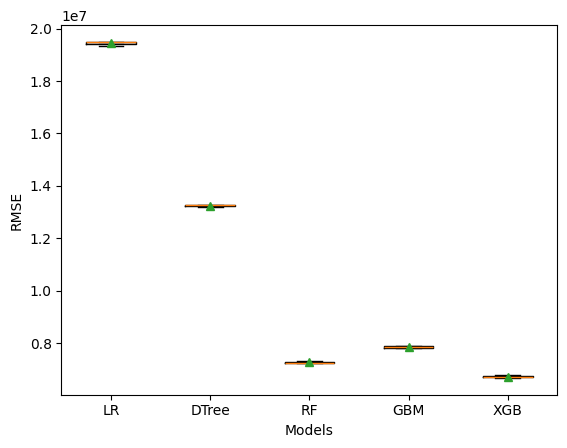

In [74]:
plt.boxplot(result, labels = names, showmeans = True)
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.show()

In [ ]:
GBM = GradientBoostingRegressor()
XGB = XGBRegressor()
RF = RandomForestRegressor()
# ('lr', RidgeCV()),('svr', LinearSVR(dual="auto", random_state=42))
stack = StackingRegressor(estimators = [('GBM', GBM), 
                                        ("RF", RF)], 
                         final_estimator=XGB,
                          cv = 3)

predictions = stack.fit(X, y).predict(encoded_test)